<div style="border:px solid blue; border-radius:1px; padding:px">
    <img src="https://news.mit.edu/sites/default/files/styles/news_article__image_gallery/public/images/202206/MIT-Pneumonia-Sensor-01-press_0.jpg?itok=pY607Gyu" width="100%">
</div>

<p style="font-size:15px;color:#000000;font-weight:500;"> What is the pneumonia? </p>

Pneumonia is an infection that inflames the air sacs in one or both lungs. The air sacs may fill with fluid or pus, causing cough with phlegm or pus, fever, chills, and difficulty breathing. A variety of organisms, including bacteria, viruses and fungi, can cause pneumonia

<p style="font-size:15px;color:#000000;font-weight:500;"> What is the main cause of pneumonia? </p>

Viruses that infect your lungs and airways can cause pneumonia. The flu (influenza virus) and the common cold (rhinovirus) are the most common causes of viral pneumonia in adults. Respiratory syncytial virus is the most common cause of viral pneumonia in young children

<p style="font-size:15px;color:#000000;font-weight:500;"> For more and detailed information: </p>

https://en.wikipedia.org/wiki/Pneumonia

# Environment Setup

## Mount GDrive

In [ ]:
# Mount Google Drive
from google.colab import drive # import drive from google colab

ROOT = "/content/drive/"     # default location for the drive
print(ROOT)                 # print content of ROOT (Optional)

drive.mount(ROOT)           # we mount the google drive at /content/drive

#%cd 'drive'
%pwd

/content/drive/
Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


'/content/drive/My Drive/Colab Notebooks/New folder/stage_2_train_images-001'

In [ ]:
!ls

**Set Path**

In [ ]:
# Import join used to join ROOT path and MY_GOOGLE_DRIVE_PATH
from os.path import join
import os

# path to our project on Google Drive
MY_GOOGLE_DRIVE_PATH = 'MyDrive/Colab Notebooks/'  # Updated path
train_folder = 'New folder/stage_2_train_images/'  # Updated path
test_zip_file = 'stage_2_test_images1234.zip'  # Updated path
test_folder = 'stage_2_test_images1234'  # Updated path
saved_folder = 'Saved_Data/'

PROJECT_PATH = join(ROOT, MY_GOOGLE_DRIVE_PATH)
TRAIN_PATH = join(PROJECT_PATH, train_folder)
TEST_PATH = join(PROJECT_PATH, test_folder)
SAVE_PATH = join(PROJECT_PATH, saved_folder)

# It's good to print out the value if you are not sure
print("PROJECT_PATH: ", PROJECT_PATH)
print("TRAIN_PATH: ", TRAIN_PATH)
print("TEST_PATH: ", TEST_PATH)
print("SAVE_PATH: ", SAVE_PATH)

# In case we haven't created the folder already; we will create a folder in the project path
if not os.path.exists(PROJECT_PATH):
    os.makedirs(PROJECT_PATH)

# Update the path for the test data zip file
zip_test_file = join(PROJECT_PATH, test_zip_file)
unzip_test_folder = join(PROJECT_PATH, test_folder)

# Check if the folder already exists
if not os.path.exists(unzip_test_folder):
    # Have set it to false to avoid it from running again
    !unzip "{zip_test_file}" -d "{unzip_test_folder}"
    print('Unzipping complete for test data')
else:
    print('Test data is already unzipped.')


PROJECT_PATH:  /content/drive/MyDrive/Colab Notebooks/
TRAIN_PATH:  /content/drive/MyDrive/Colab Notebooks/New folder/stage_2_train_images/
TEST_PATH:  /content/drive/MyDrive/Colab Notebooks/stage_2_test_images1234
SAVE_PATH:  /content/drive/MyDrive/Colab Notebooks/Saved_Data/
Test data is already unzipped.


## Unzip the Train and Test Data.

In [ ]:
zip_file = '/content/drive/MyDrive/Colab Notebooks/New folder/stage_2_train_images-001.zip'
unzip_folder = '/content/drive/MyDrive/Colab Notebooks/New folder/'

if not os.path.exists(unzip_folder):  # Check if the folder already exists
    os.makedirs(unzip_folder)

if not os.path.exists(os.path.join(unzip_folder, 'stage_2_train_images')):
    # Have set it to false to avoid it from running again
    !unzip "{zip_file}" -d "{unzip_folder}"
    print('Unzipping complete')
else:
    print('Data is already unzipped.')


Data is already unzipped.


In [ ]:
zip_test_file = '/content/drive/MyDrive/Colab Notebooks/stage_2_test_images1234.zip.zip'
unzip_test_folder = '/content/drive/MyDrive/Colab Notebooks/'

if not os.path.exists(unzip_test_folder):  # Check if the folder already exists
    os.makedirs(unzip_test_folder)

if not os.path.exists(os.path.join(unzip_test_folder, 'stage_2_test_images')):
    # Have set it to false to avoid it from running again
    !unzip "{zip_test_file}" -d "{unzip_test_folder}"
    print('Unzipping complete for test data')
else:
    print('Test data is already unzipped.')


Test data is already unzipped.


# EDA

## Read Data

In [ ]:
%cd {PROJECT_PATH}
%cd 'Data'
import pandas as pd

class_info = pd.read_csv('stage_2_detailed_class_info.csv')
print(class_info.shape)
print(class_info.head())

train_labels = pd.read_csv('stage_2_train_labels.csv')
print(train_labels.shape)
print(train_labels.head())

# Total 30227 observations

/content/drive/MyDrive/Colab Notebooks
[Errno 2] No such file or directory: 'Data'
/content/drive/MyDrive/Colab Notebooks
(30227, 2)
                              patientId                         class
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6  No Lung Opacity / Not Normal
1  00313ee0-9eaa-42f4-b0ab-c148ed3241cd  No Lung Opacity / Not Normal
2  00322d4d-1c29-4943-afc9-b6754be640eb  No Lung Opacity / Not Normal
3  003d8fa0-6bf1-40ed-b54c-ac657f8495c5                        Normal
4  00436515-870c-4b36-a041-de91049b9ab4                  Lung Opacity
(30227, 6)
                              patientId      x      y  width  height  Target
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6    NaN    NaN    NaN     NaN       0
1  00313ee0-9eaa-42f4-b0ab-c148ed3241cd    NaN    NaN    NaN     NaN       0
2  00322d4d-1c29-4943-afc9-b6754be640eb    NaN    NaN    NaN     NaN       0
3  003d8fa0-6bf1-40ed-b54c-ac657f8495c5    NaN    NaN    NaN     NaN       0
4  00436515-870c-4b36-a041-de91049b9ab4  264.0  152

**Data Cleaning Process**

In [ ]:
#Data Cleanup
def check_data(data_file):
  print('\nIs NA:\n',data_file.isna().sum())
  print('\nUnique Patients:\n',len(data_file['patientId'].unique()))
  # print(train_labels.isna().sum())
  # print(data_file[data_file['Target'] == 1].isna().sum())

#lot of labels are missing. use target =1 only
check_data(class_info)
check_data(train_labels)
#total 26k unique patients are present
# 20672 entries do not have x,y in it


Is NA:
 patientId    0
class        0
dtype: int64

Unique Patients:
 26684

Is NA:
 patientId        0
x            20672
y            20672
width        20672
height       20672
Target           0
dtype: int64

Unique Patients:
 26684


**Merging the Two Datasets.**

In [ ]:
# Merging the data in two csv into one.
class_info_train_labels_merge = train_labels.merge(class_info, left_on='patientId', right_on='patientId', how='inner')
class_info_train_labels_merge.head()

patientId      x      y  width  height  Target  \
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6    NaN    NaN    NaN     NaN       0   
1  00313ee0-9eaa-42f4-b0ab-c148ed3241cd    NaN    NaN    NaN     NaN       0   
2  00322d4d-1c29-4943-afc9-b6754be640eb    NaN    NaN    NaN     NaN       0   
3  003d8fa0-6bf1-40ed-b54c-ac657f8495c5    NaN    NaN    NaN     NaN       0   
4  00436515-870c-4b36-a041-de91049b9ab4  264.0  152.0  213.0   379.0       1   

                          class  
0  No Lung Opacity / Not Normal  
1  No Lung Opacity / Not Normal  
2  No Lung Opacity / Not Normal  
3                        Normal  
4                  Lung Opacity

In [ ]:
check_data(class_info_train_labels_merge)
#20672 rows do not have X and Y info.


Is NA:
 patientId        0
x            20672
y            20672
width        20672
height       20672
Target           0
class            0
dtype: int64

Unique Patients:
 26684


In [ ]:
print(class_info_train_labels_merge[class_info_train_labels_merge['Target'] == 0].isna().sum())
#For target =1 we have values in all the columns.

patientId        0
x            20672
y            20672
width        20672
height       20672
Target           0
class            0
dtype: int64


In [ ]:
print(class_info_train_labels_merge[class_info_train_labels_merge['class'] == 'Normal'].isna().sum())
# 8851 missing values for normal class

print(class_info_train_labels_merge[class_info_train_labels_merge['class'] == 'No Lung Opacity / Not Normal'].isna().sum())
# 11821 missing values, total of 20672 is maintained

print(class_info_train_labels_merge[class_info_train_labels_merge['class'] == 'Lung Opacity'].isna().sum())
# no missing values

patientId       0
x            8851
y            8851
width        8851
height       8851
Target          0
class           0
dtype: int64
patientId        0
x            11821
y            11821
width        11821
height       11821
Target           0
class            0
dtype: int64
patientId    0
x            0
y            0
width        0
height       0
Target       0
class        0
dtype: int64


In [ ]:
class_info_train_labels_merge.groupby('class')['Target'].unique()
# All lung opacity has target=1 and no other class has target 1. so all pneumonia cases are with lung opacity and target=1

class
Lung Opacity                    [1]
No Lung Opacity / Not Normal    [0]
Normal                          [0]
Name: Target, dtype: object

In [ ]:
#Check distribution
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
print(train_labels['Target'].isnull().sum())


0


In [ ]:
%matplotlib inline


In [ ]:
print(train_labels['Target'].value_counts())


0    20672
1     9555
Name: Target, dtype: int64


## Read DICOM Images

In [ ]:
#Set Project Path

%cd {PROJECT_PATH}
%cd 'New folder/stage_2_train_images-001'

/content/drive/MyDrive/Colab Notebooks
/content/drive/MyDrive/Colab Notebooks/New folder/stage_2_train_images-001


In [ ]:
#Load Dependencies
!pip install pydicom
import pydicom

import matplotlib.pyplot as plt

In [ ]:
import os
import pydicom

def load_image(imagename):
    image_path = os.path.join(TRAIN_PATH, imagename)

    if os.path.exists(image_path):
        try:
            image = pydicom.dcmread(image_path)
            print(f"Loaded image: {imagename}")
            return image
        except Exception as e:
            print(f"Error loading image {imagename}: {str(e)}")
            return None
    else:
        print(f"Error: Image not found - {imagename}")
        return None


**Defining the Images for Normal Images,No Lung Opacity/Not Notmal,Lung Opaacity.**

Loaded image: /content/drive/MyDrive/Colab Notebooks/New folder/stage_2_train_images/0004cfab-14fd-4e49-80ba-63a80b6bddd6.dcm
Loaded image: /content/drive/MyDrive/Colab Notebooks/New folder/stage_2_train_images/003d8fa0-6bf1-40ed-b54c-ac657f8495c5.dcm
Loaded image: /content/drive/MyDrive/Colab Notebooks/New folder/stage_2_train_images/00436515-870c-4b36-a041-de91049b9ab4.dcm


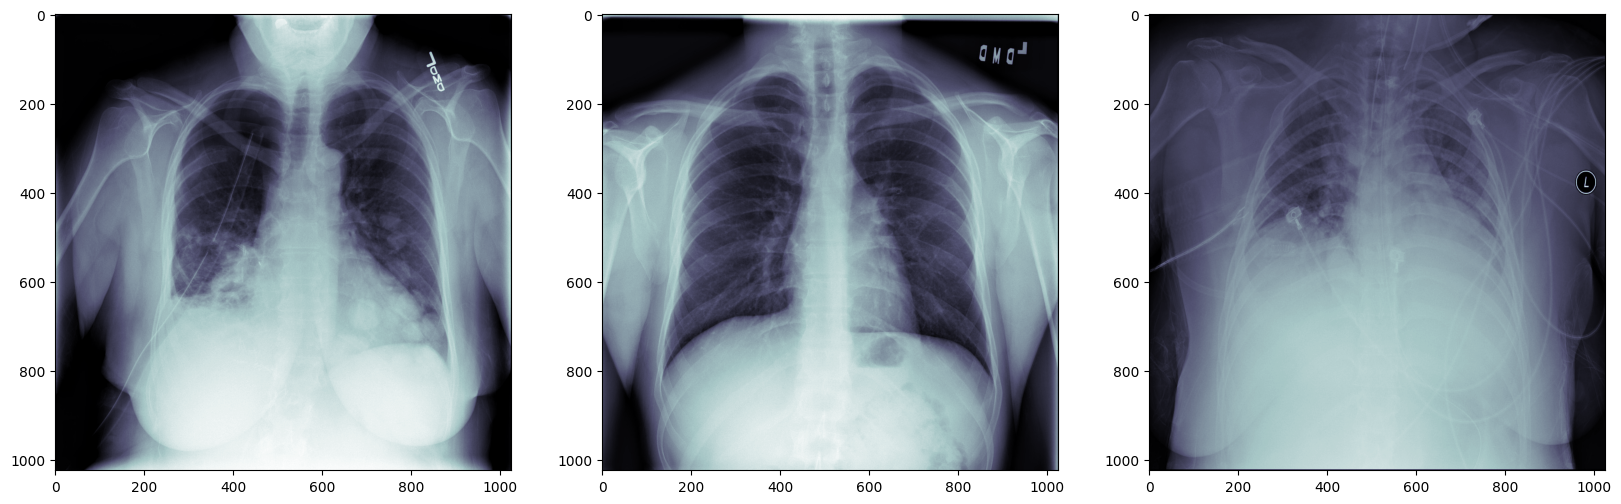

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 15))


image_names = [
    '/content/drive/MyDrive/Colab Notebooks/New folder/stage_2_train_images/0004cfab-14fd-4e49-80ba-63a80b6bddd6.dcm',
    '/content/drive/MyDrive/Colab Notebooks/New folder/stage_2_train_images/003d8fa0-6bf1-40ed-b54c-ac657f8495c5.dcm',
    '/content/drive/MyDrive/Colab Notebooks/New folder/stage_2_train_images/00436515-870c-4b36-a041-de91049b9ab4.dcm'
]

for i, ax in enumerate(axes):
    image = load_image(image_names[i])

    if image and hasattr(image, 'pixel_array'):
        ax.imshow(image.pixel_array, cmap=plt.cm.bone)
    else:
        # Handle error or skip the subplot
        pass


Loaded image: /content/drive/MyDrive/Colab Notebooks/New folder/stage_2_train_images/0004cfab-14fd-4e49-80ba-63a80b6bddd6.dcm
Loaded image: /content/drive/MyDrive/Colab Notebooks/New folder/stage_2_train_images/003d8fa0-6bf1-40ed-b54c-ac657f8495c5.dcm
Loaded image: /content/drive/MyDrive/Colab Notebooks/New folder/stage_2_train_images/00436515-870c-4b36-a041-de91049b9ab4.dcm


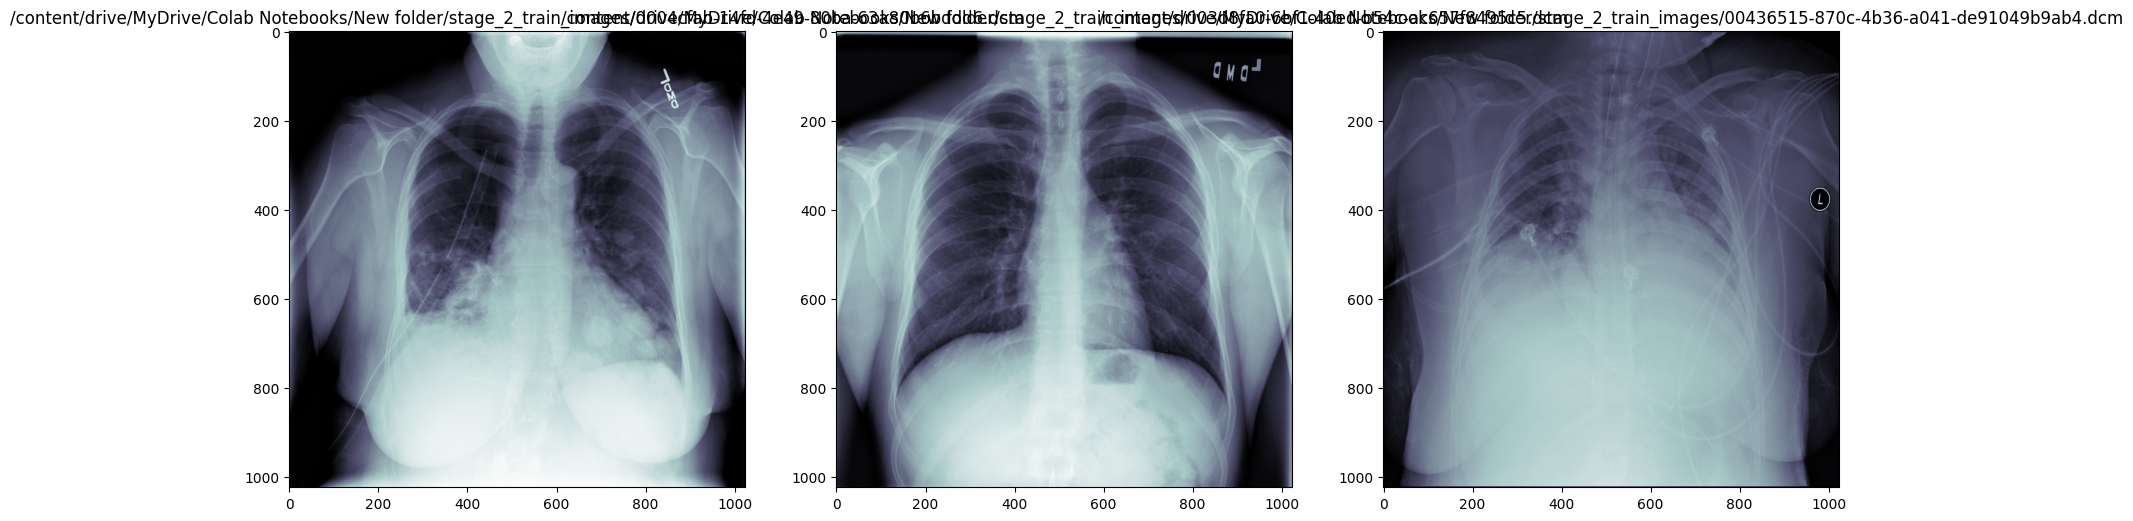

In [ ]:
import os
import pydicom
import matplotlib.pyplot as plt

# Function to load an image
def load_image(imagename):
    image_path = os.path.join(TRAIN_PATH, imagename)

    if os.path.exists(image_path):
        try:
            image = pydicom.dcmread(image_path)
            print(f"Loaded image: {imagename}")
            return image
        except Exception as e:
            print(f"Error loading image {imagename}: {str(e)}")
            return None
    else:
        print(f"Error: Image not found - {imagename}")
        return None

# Check sample images
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 15))

image_names = [
    '/content/drive/MyDrive/Colab Notebooks/New folder/stage_2_train_images/0004cfab-14fd-4e49-80ba-63a80b6bddd6.dcm',
    '/content/drive/MyDrive/Colab Notebooks/New folder/stage_2_train_images/003d8fa0-6bf1-40ed-b54c-ac657f8495c5.dcm',
    '/content/drive/MyDrive/Colab Notebooks/New folder/stage_2_train_images/00436515-870c-4b36-a041-de91049b9ab4.dcm'
]

for i, ax in enumerate(axes):
    image = load_image(image_names[i])

    if image is not None and hasattr(image, 'pixel_array'):
        ax.imshow(image.pixel_array, cmap=plt.cm.bone)
        ax.set_title(image_names[i])
    else:
        # Handle error or skip the subplot
        print(f"Skipping subplot for {image_names[i]}")

plt.show()


Pixel Array Shape: (1024, 1024)


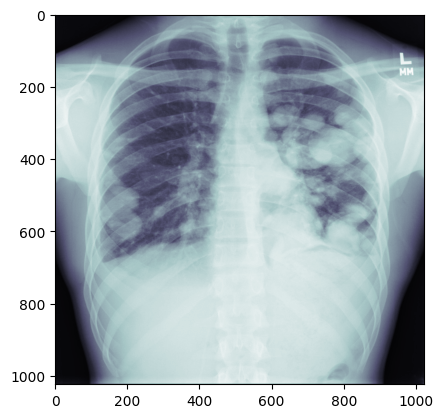

In [ ]:
import pydicom
import matplotlib.pyplot as plt

# Specify the path to the DICOM file (remove the trailing slash)
file_path = '/content/drive/MyDrive/Colab Notebooks/New folder/stage_2_train_images/00322d4d-1c29-4943-afc9-b6754be640eb.dcm'

# Read the DICOM file
dicom_data = pydicom.dcmread(file_path)

# Access the pixel array
pixel_array = dicom_data.pixel_array

# Display the shape of the pixel array
print("Pixel Array Shape:", pixel_array.shape)

# Display the image
plt.imshow(pixel_array, cmap=plt.cm.bone)
plt.show()


## Read DICOM data

In [ ]:
#Check data within a sample file
dcm_data = pydicom.read_file('/content/drive/MyDrive/Colab Notebooks/New folder/stage_2_train_images/00322d4d-1c29-4943-afc9-b6754be640eb.dcm')

print(dcm_data)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 202
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.276.0.7230010.3.1.4.8323329.11252.1517874357.450548
(0002, 0010) Transfer Syntax UID                 UI: JPEG Baseline (Process 1)
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.0
(0002, 0013) Implementation Version Name         SH: 'OFFIS_DCMTK_360'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.8323329.11252.1517874357.450548
(0008, 0020) Study Date                          DA: '19010101'
(0008, 0030) Study Time      

In [ ]:
# Function to fetch dicom data from files
# We need to create a combined file with all the parameters in one place.
vars = ['Modality', 'PatientAge', 'PatientSex', 'BodyPartExamined', 'ViewPosition', 'ConversionType', 'Rows', 'Columns', 'PixelSpacing']

def get_DICOM_metadata(class_info):
  if(os.path.isfile(PROJECT_PATH+'Data/class_info_train_labels_merge_metadata.csv')):# PROJECT_PATH = join(ROOT, MY_GOOGLE_DRIVE_PATH)
    class_info = pd.read_csv(PROJECT_PATH+'/class_info_train_labels_merge_metadata.csv')
    class_info.drop([class_info.columns[0]], axis=1, inplace=True)
  else:
    #get file list from folder
    image_train_path = os.listdir(PROJECT_PATH+'New folder/stage_2_train_images')
    image_test_path = os.listdir(PROJECT_PATH+'/stage_2_test_images')
    print("Number of images in train set:", len(image_train_path),"\nNumber of images in test set:", len(image_test_path))

    vars = ['Modality', 'PatientAge', 'PatientSex', 'BodyPartExamined', 'ViewPosition', 'ConversionType', 'Rows', 'Columns', 'PixelSpacing']

    for var in vars:
          class_info[var] = None
    #iterate on files and append metadata
    for i,filename in enumerate(image_train_path):
      #print('processing:',i,filename)
      dcm_data = pydicom.read_file(PROJECT_PATH+'New folder/stage_2_train_images/'+filename)
      idx = (class_info['patientId']==dcm_data.PatientID)
      class_info.loc[idx,'Modality'] = dcm_data.Modality
      class_info.loc[idx,'PatientAge'] = pd.to_numeric(dcm_data.PatientAge)
      class_info.loc[idx,'PatientSex'] = dcm_data.PatientSex
      class_info.loc[idx,'BodyPartExamined'] = dcm_data.BodyPartExamined
      class_info.loc[idx,'ViewPosition'] = dcm_data.ViewPosition
      class_info.loc[idx,'ConversionType'] = dcm_data.ConversionType
      class_info.loc[idx,'Rows'] = dcm_data.Rows
      class_info.loc[idx,'Columns'] = dcm_data.Columns
      class_info.loc[idx,'PixelSpacing'] = str.format("{:4.3f}",dcm_data.PixelSpacing[0])
    #save to a file for future and dont run the function if the file exists
    class_info.to_csv(PROJECT_PATH+'/class_info_train_labels_merge_metadata.csv')

  class_info['xc'] = class_info['x'] + class_info['width'] / 2
  class_info['yc'] = class_info['y'] + class_info['height'] / 2

  return class_info

class_info_train_labels_merge_metadata = get_DICOM_metadata(class_info_train_labels_merge)

class_info_train_labels_merge_metadata.head()

Number of images in train set: 12250 
Number of images in test set: 3000


patientId      x      y  width  height  Target  \
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6    NaN    NaN    NaN     NaN       0   
1  00313ee0-9eaa-42f4-b0ab-c148ed3241cd    NaN    NaN    NaN     NaN       0   
2  00322d4d-1c29-4943-afc9-b6754be640eb    NaN    NaN    NaN     NaN       0   
3  003d8fa0-6bf1-40ed-b54c-ac657f8495c5    NaN    NaN    NaN     NaN       0   
4  00436515-870c-4b36-a041-de91049b9ab4  264.0  152.0  213.0   379.0       1   

                          class Modality PatientAge PatientSex  \
0  No Lung Opacity / Not Normal       CR         51          F   
1  No Lung Opacity / Not Normal     None       None       None   
2  No Lung Opacity / Not Normal       CR         19          M   
3                        Normal       CR         28          M   
4                  Lung Opacity       CR         32          F   

  BodyPartExamined ViewPosition ConversionType  Rows Columns PixelSpacing  \
0            CHEST           PA            WSD  1024    1024        0.143   
1             None         None           None  None    None         None   
2            CHEST           AP            WSD  1024    1024        0.168   
3            CHEST           PA            WSD  1024    1024        0.143   
4            CHEST           AP            WSD  1024    1024        0.139   

      xc     yc  
0    NaN    NaN  
1    NaN    NaN  
2    NaN    NaN  
3    NaN    NaN  
4  370.5  341.5

This code defines a function named get_DICOM_metadata, which fetches metadata from DICOM files and appends it to the given DataFrame (class_info). The metadata includes information such as modality, patient age, sex, body part examined, view position, conversion type, rows, columns, and pixel spacing. The function first checks if a CSV file containing the combined metadata already exists, and if so, it reads and returns that file. Otherwise, it iterates through the DICOM files in the training set, extracts the relevant metadata, and appends it to the DataFrame. The resulting DataFrame is then saved to a CSV file for future use.

The last part of the code calls this function with a DataFrame named class_info_train_labels_merge, providing an initial dataset. The head of the resulting DataFrame (class_info_train_labels_merge_metadata) is printed, displaying the first few rows of the combined metadata. This combined metadata can be used for further analysis and visualization of the DICOM data.

In [ ]:
# Check improper values in dataset
def check_data_set(class_info):
  print(class_info.isna().sum())
  #print(train_labels[train_labels['Target'] == 1].isna().sum())
check_data_set(class_info)

patientId    0
class        0
dtype: int64


In [ ]:
# Draw graphs from the data
def drawgraphs(data_file,columns,hue=False,width =15,showdistribution=True):
    print('Creating graph for X axis:'," and Y axis:",columns)
    length=len(columns)*6
    total = float(len(data_file))

    fig, axes = plt.subplots(nrows=len(columns) if len(columns)>1 else 1,ncols=1,figsize=(width, length) )
    for index,content in enumerate(columns):
      plt.title(content)

      currentaxes = 0
      if(len(columns)>1):
        currentaxes = axes[index]
      else:
        currentaxes = axes

      if(hue):
        sns.countplot(x=columns[index],data=data_file,ax=currentaxes, hue=hue)

      else:
        sns.countplot(x=columns[index],data=data_file,ax=currentaxes)

      if(showdistribution):
        for p in (currentaxes.patches):
            height = p.get_height()
            if(height>0 and total>0):
              currentaxes.text(p.get_x()+p.get_width()/2., height + 3, '{:1.2f}%'.format(100*height/total), ha="center")

    return True

This code defines a function named drawgraphs that takes a DataFrame (`data_file`), a list of column names (`columns`), an optional hue variable for color differentiation (`hue`), and other parameters for customizing the appearance of the graphs. The function uses Matplotlib and Seaborn to create count plots for each specified column, visualizing the distribution of data in a categorical or discrete format. The function is designed to handle multiple columns, arranging them vertically if there is more than one. Additionally, the function provides the option to display distribution percentages on top of each bar. The title of each subplot corresponds to the respective column being visualized. The goal is to offer a quick and efficient way to explore and analyze the distribution of data across different categorical features in the given DataFrame.

Creating graph for X axis:  and Y axis: Index(['Target', 'class', 'Modality', 'PatientAge', 'PatientSex',
       'BodyPartExamined', 'ViewPosition', 'ConversionType', 'Rows', 'Columns',
       'PixelSpacing'],
      dtype='object')


True

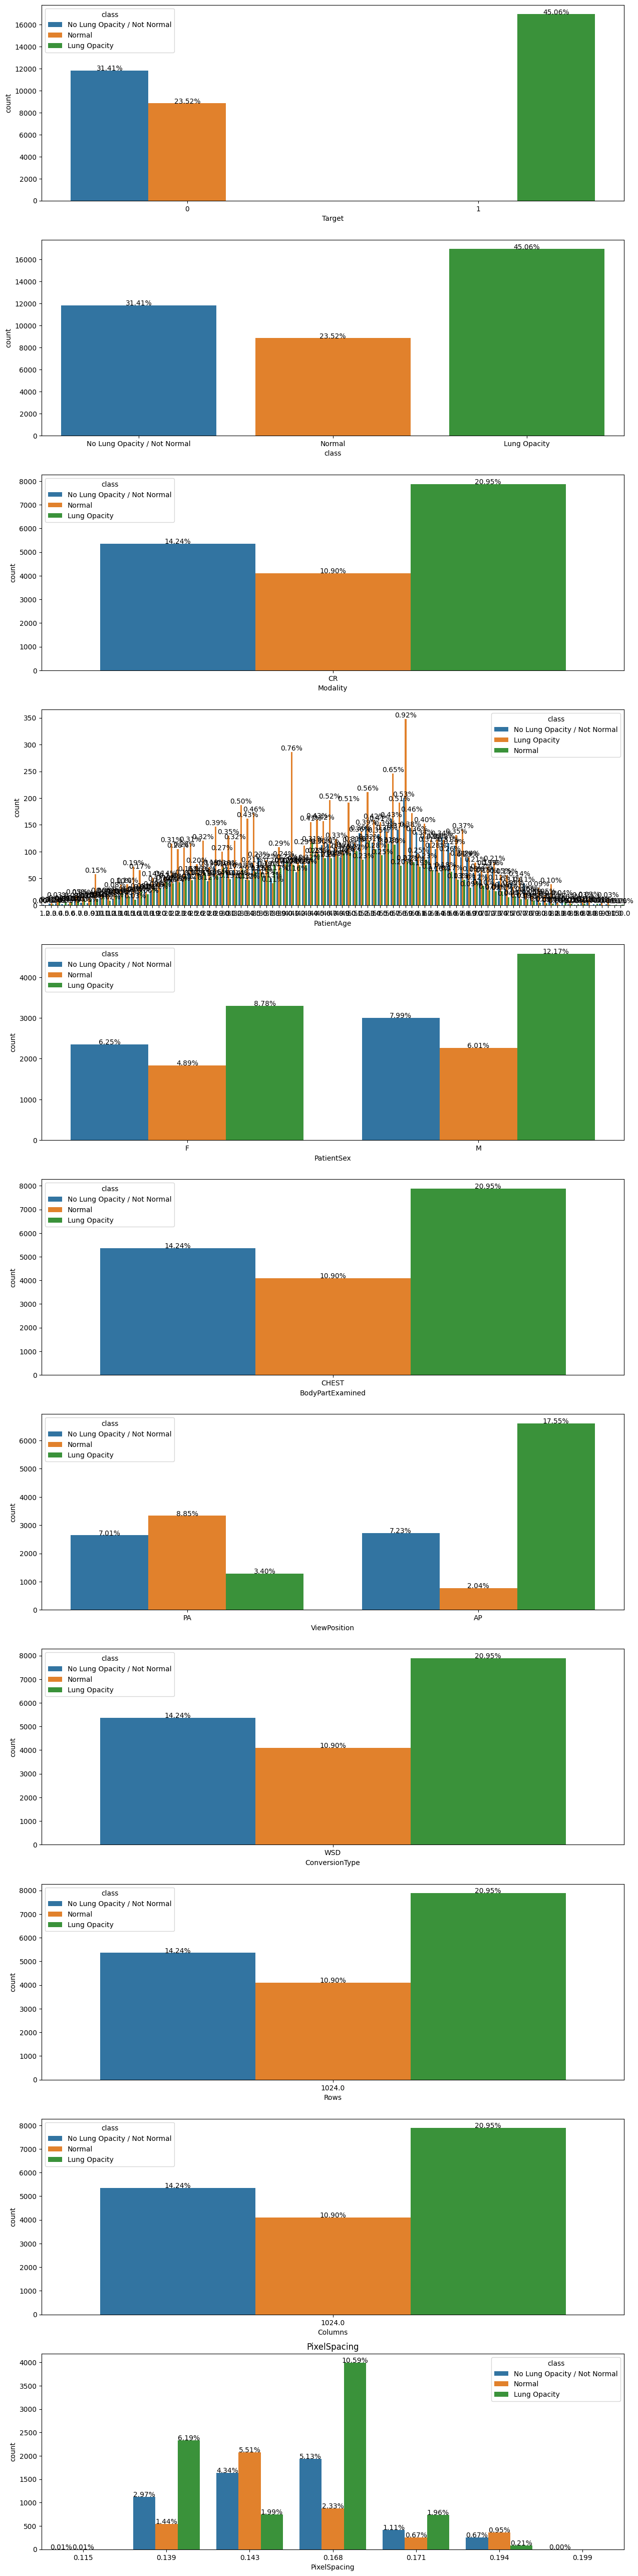

In [ ]:
# Function to fetch dicom data from files
# We need to create a combined file with all the parameters in one place.
vars = ['Modality', 'PatientAge', 'PatientSex', 'BodyPartExamined', 'ViewPosition', 'ConversionType', 'Rows', 'Columns', 'PixelSpacing']

def get_DICOM_metadata(class_info):
    if os.path.isfile(PROJECT_PATH+'/class_info_train_labels_merge_metadata.csv'):
        class_info = pd.read_csv(PROJECT_PATH+'/class_info_train_labels_merge_metadata.csv')
        class_info.drop([class_info.columns[0]], axis=1, inplace=True)
    else:
        # get file list from folder
        image_train_path = os.listdir(PROJECT_PATH+'New folder/stage_2_train_images')
        image_test_path = os.listdir(PROJECT_PATH+'/stage_2_test_images')
        print("Number of images in train set:", len(image_train_path), "\nNumber of images in test set:", len(image_test_path))

        vars = ['Modality', 'PatientAge', 'PatientSex', 'BodyPartExamined', 'ViewPosition', 'ConversionType', 'Rows', 'Columns', 'PixelSpacing']

        for var in vars:
            class_info[var] = None

        # iterate on files and append metadata
        for i, filename in enumerate(image_train_path):
            # print('processing:',i,filename)
            dcm_data = pydicom.read_file(PROJECT_PATH+'New folder/stage_2_train_images/'+filename)
            idx = (class_info['patientId'] == dcm_data.PatientID)
            class_info.loc[idx, 'Modality'] = dcm_data.Modality
            class_info.loc[idx, 'PatientAge'] = pd.to_numeric(dcm_data.PatientAge)
            class_info.loc[idx, 'PatientSex'] = dcm_data.PatientSex
            class_info.loc[idx, 'BodyPartExamined'] = dcm_data.BodyPartExamined
            class_info.loc[idx, 'ViewPosition'] = dcm_data.ViewPosition
            class_info.loc[idx, 'ConversionType'] = dcm_data.ConversionType
            class_info.loc[idx, 'Rows'] = dcm_data.Rows
            class_info.loc[idx, 'Columns'] = dcm_data.Columns
            class_info.loc[idx, 'PixelSpacing'] = str.format("{:4.3f}", dcm_data.PixelSpacing[0])

        # convert categorical columns to 'category' type
        cat_columns = ['Modality', 'PatientSex', 'BodyPartExamined', 'ViewPosition', 'ConversionType']
        class_info[cat_columns] = class_info[cat_columns].astype('category')

        # save to a file for future and don't run the function if the file exists
        class_info.to_csv(PROJECT_PATH+'/class_info_train_labels_merge_metadata.csv')

    class_info['xc'] = class_info['x'] + class_info['width'] / 2
    class_info['yc'] = class_info['y'] + class_info['height'] / 2

    return class_info

class_info_train_labels_merge_metadata = get_DICOM_metadata(class_info_train_labels_merge)

# Example usage
drawgraphs(data_file=class_info_train_labels_merge_metadata, columns=class_info_train_labels_merge_metadata.columns[5:16], hue='class')


This code defines a function get_DICOM_metadata that fetches metadata from DICOM files and creates a combined DataFrame containing information such as modality, patient age, sex, body part examined, view position, conversion type, image dimensions, and pixel spacing. The function checks if the metadata file already exists and loads it if present to avoid redundant computations. Otherwise, it iterates through the DICOM files in the training set, extracts relevant metadata, and saves the combined information to a CSV file for future use. The metadata is then used to create a new DataFrame, class_info_train_labels_merge_metadata, which includes additional calculated columns for bounding box center coordinates (xc and yc). Finally, an example usage is provided where graphs are drawn based on specific columns from the metadata DataFrame, with color-coded data points according to the 'class' column.

Creating graph for X axis:  and Y axis: ['PatientAge']


True

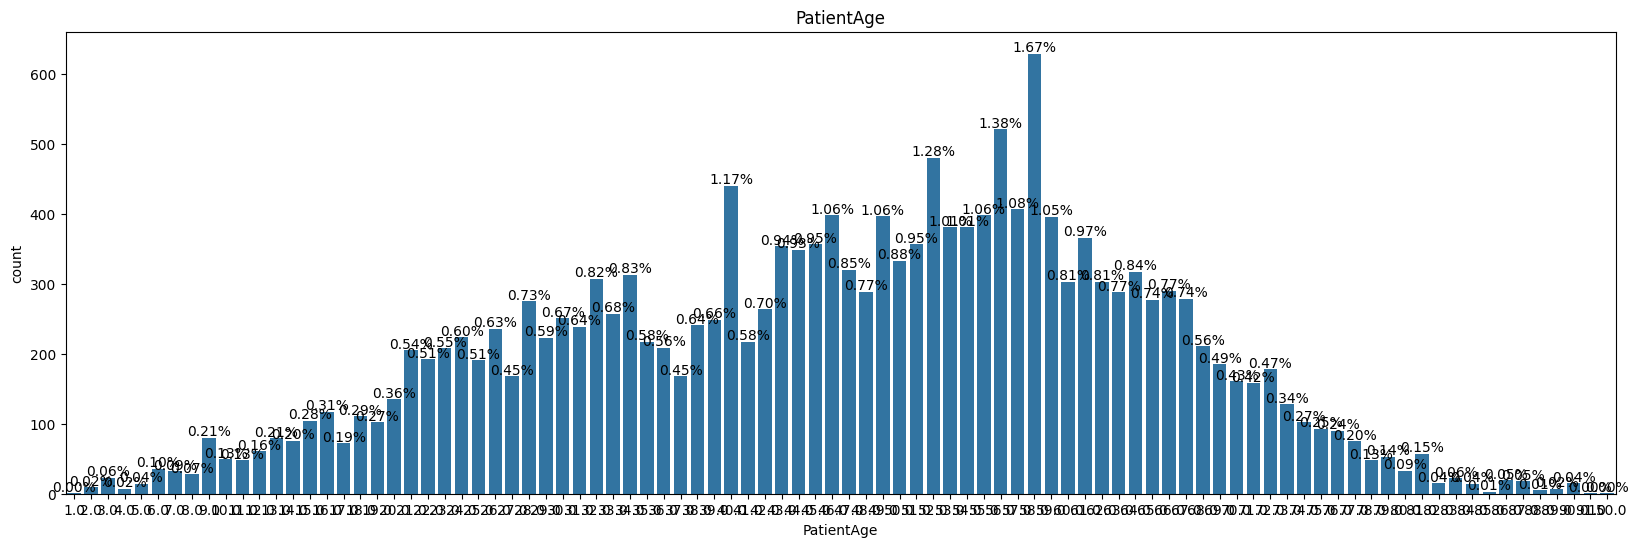

In [ ]:
# Draw graphs from the data
def drawgraphs(data_file, columns, hue=False, width=15, show_distribution=True):
    print('Creating graph for X axis:', " and Y axis:", columns)
    length = len(columns) * 6
    total = float(len(data_file))

    fig, axes = plt.subplots(nrows=len(columns) if len(columns) > 1 else 1, ncols=1, figsize=(width, length))
    for index, content in enumerate(columns):
        plt.title(content)

        currentaxes = 0
        if len(columns) > 1:
            currentaxes = axes[index]
        else:
            currentaxes = axes

        if hue:
            sns.countplot(x=columns[index], data=data_file, ax=currentaxes, hue=hue)

        else:
            sns.countplot(x=columns[index], data=data_file, ax=currentaxes)

        if show_distribution:
            for p in (currentaxes.patches):
                height = p.get_height()
                if height > 0 and total > 0:
                    currentaxes.text(p.get_x() + p.get_width() / 2., height + 3,
                                     '{:1.2f}%'.format(100 * height / total), ha="center")

    return True

# Example usage
drawgraphs(data_file=class_info_train_labels_merge_metadata, columns=['PatientAge'], width=20, show_distribution=True)


This code defines a function named drawgraphs for creating count plots using Seaborn to visualize the distribution of data in a DataFrame. The function takes parameters such as data_file (the DataFrame to visualize), columns (the columns to use for plotting), hue (if provided, differentiates data points based on this column), width (width of the plot), and show_distribution (whether to display the distribution percentages on the plot).

In the example usage provided at the end, the function is called with the DataFrame class_info_train_labels_merge_metadata and the column 'PatientAge'. It sets the width of the plot to 20, and it shows the distribution percentages on the plot. The purpose of this example is to visualize the distribution of patient ages in the provided DataFrame. The function uses Seaborn's countplot for creating the plots.

In [ ]:
import numpy as np
custom_bucket_array = np.linspace(0, 160, 17)
custom_bucket_array

class_info_train_labels_merge_metadata['PatientAgeBucket'] =pd.cut(class_info_train_labels_merge_metadata['PatientAge'], custom_bucket_array)
class_info_train_labels_merge_metadata.head(1)

patientId   x   y  width  height  Target  \
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6 NaN NaN    NaN     NaN       0   

                          class Modality  PatientAge PatientSex  \
0  No Lung Opacity / Not Normal       CR        51.0          F   

  BodyPartExamined ViewPosition ConversionType    Rows  Columns  PixelSpacing  \
0            CHEST           PA            WSD  1024.0   1024.0         0.143   

   xc  yc PatientAgeBucket  
0 NaN NaN     (50.0, 60.0]

The code concludes by displaying the first row of the DataFrame with the newly added 'PatientAgeBucket' column, offering a quick insight into the bin assignments. This approach facilitates data analysis and visualization by grouping patient ages into meaningful ranges, aiding in the interpretation of trends or patterns related to age in the dataset.

Creating graph for X axis:  and Y axis: ['PatientAgeBucket']


True

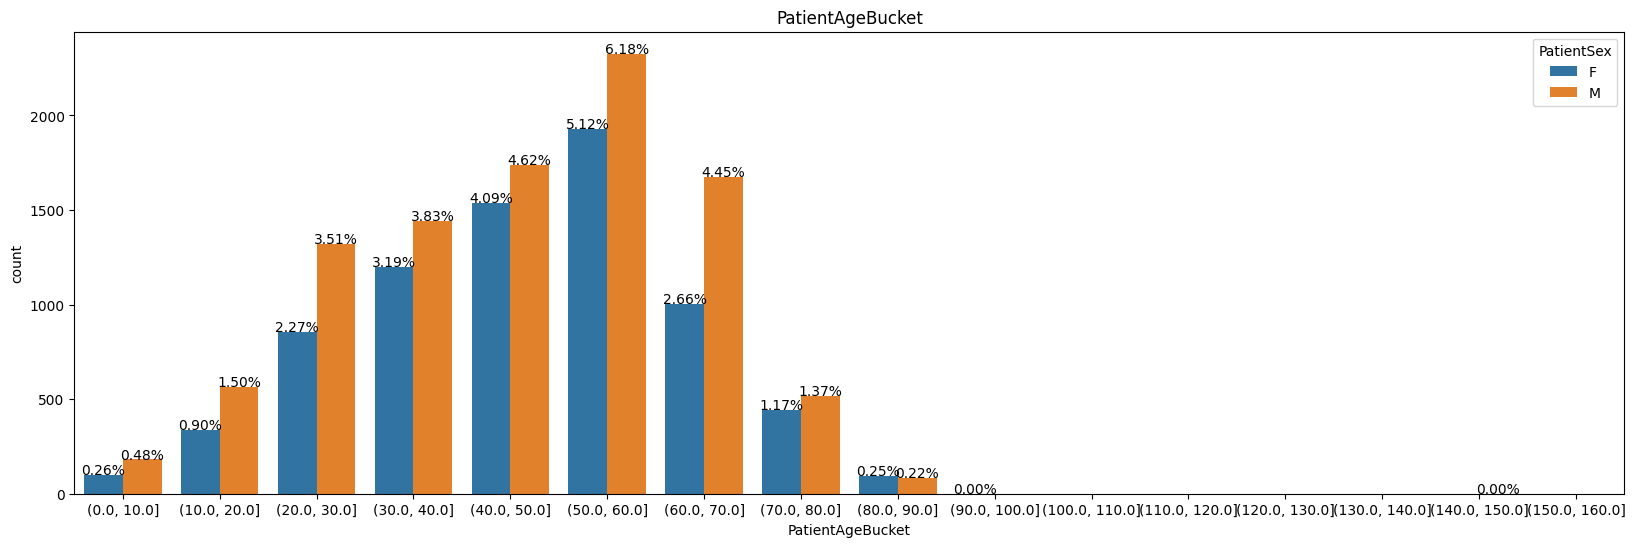

In [ ]:
# Draw graphs from the data
def drawgraphs(data_file, columns, hue=None, width=15, showdistribution=True):
    print('Creating graph for X axis:', " and Y axis:", columns)
    length = len(columns) * 6
    total = float(len(data_file))

    fig, axes = plt.subplots(nrows=len(columns) if len(columns) > 1 else 1, ncols=1, figsize=(width, length))
    for index, content in enumerate(columns):
        plt.title(content)

        currentaxes = 0
        if len(columns) > 1:
            currentaxes = axes[index]
        else:
            currentaxes = axes

        if hue:
            sns.countplot(x=columns[index], data=data_file, ax=currentaxes, hue=hue)

        else:
            sns.countplot(x=columns[index], data=data_file, ax=currentaxes)

        if showdistribution:
            for p in (currentaxes.patches):
                height = p.get_height()
                if height > 0 and total > 0:
                    currentaxes.text(p.get_x() + p.get_width() / 2., height + 3,
                                     '{:1.2f}%'.format(100 * height / total), ha="center")

    return True

# Example usage
drawgraphs(data_file=class_info_train_labels_merge_metadata, columns=['PatientAgeBucket'], width=20, showdistribution=True, hue='PatientSex')


 The example usage demonstrates plotting 'PatientAgeBucket' counts, differentiated by 'PatientSex,' offering insights into the age distribution across genders in the given dataset. Overall, the function provides a convenient way to explore and visualize categorical data relationships.

Creating graph for X axis:  and Y axis: ['PatientSex']


True

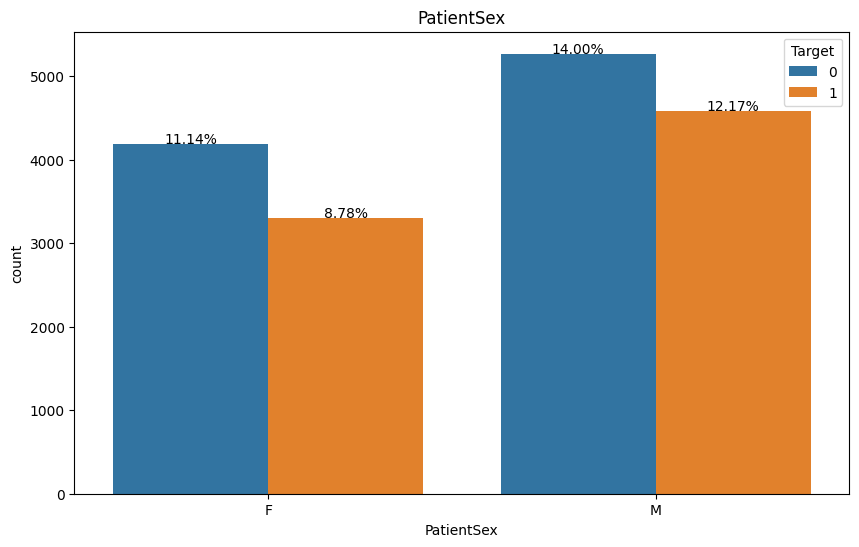

In [ ]:
drawgraphs(data_file= class_info_train_labels_merge_metadata, columns= ['PatientSex'], width =10, showdistribution=True, hue='Target')
# There are higher number of records of male than female. Both for target 0 and 1.

The visualization reveals that there are more records for males than females, irrespective of the target values (0 or 1). This information suggests an imbalance in the dataset with respect to gender distribution, which is crucial to consider when interpreting and modeling data, as it may impact the performance of machine learning algorithms, particularly in binary classification tasks like predicting the 'Target.'






## Bounding box analysis

In [ ]:
class_info_train_labels_merge_metadata['xc'] = class_info_train_labels_merge_metadata['x'] + class_info_train_labels_merge_metadata['width'] / 2
class_info_train_labels_merge_metadata['yc'] = class_info_train_labels_merge_metadata['y'] + class_info_train_labels_merge_metadata['height'] / 2
class_info_train_labels_merge_metadata.head(1)

patientId   x   y  width  height  Target  \
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6 NaN NaN    NaN     NaN       0   

                          class Modality  PatientAge PatientSex  \
0  No Lung Opacity / Not Normal       CR        51.0          F   

  BodyPartExamined ViewPosition ConversionType    Rows  Columns  PixelSpacing  \
0            CHEST           PA            WSD  1024.0   1024.0         0.143   

   xc  yc PatientAgeBucket  
0 NaN NaN     (50.0, 60.0]

The resulting dataframe displays the newly computed 'xc' and 'yc' values for the first record in the dataset. These center coordinates are useful for tasks such as object localization, providing a more convenient representation of the position of objects within the bounding boxes.

In [ ]:
from matplotlib.patches import Rectangle

def plot_window(data,color_point, color_window,text):
    fig, ax = plt.subplots(1,1,figsize=(7,7))
    plt.title("Centers of Lung Opacity rectangles over rectangles\n{}".format(text))
    data.plot.scatter(x='xc', y='yc', xlim=(0,1024), ylim=(0,1024), ax=ax, alpha=0.8, marker=".", color=color_point)
    for i, crt_sample in data.iterrows():
        ax.add_patch(Rectangle(xy=(crt_sample['x'], crt_sample['y']),
            width=crt_sample['width'],height=crt_sample['height'],alpha=3.5e-3, color=color_window))
    plt.show()

** The scatter plot displays points representing the centers of lung opacity rectangles, with the x and y coordinates specified by the 'xc' and 'yc' columns of the input data. Additionally, the function adds rectangles to the plot using the 'x', 'y', 'width', and 'height' columns of the data, creating a visual representation of the bounding boxes. The color of the points and rectangles can be customized using the 'color_point' and 'color_window' parameters. The resulting plot provides a clear visualization of the distribution of lung opacity centers along with the corresponding rectangles, aiding in the analysis of object localization within the medical images.**

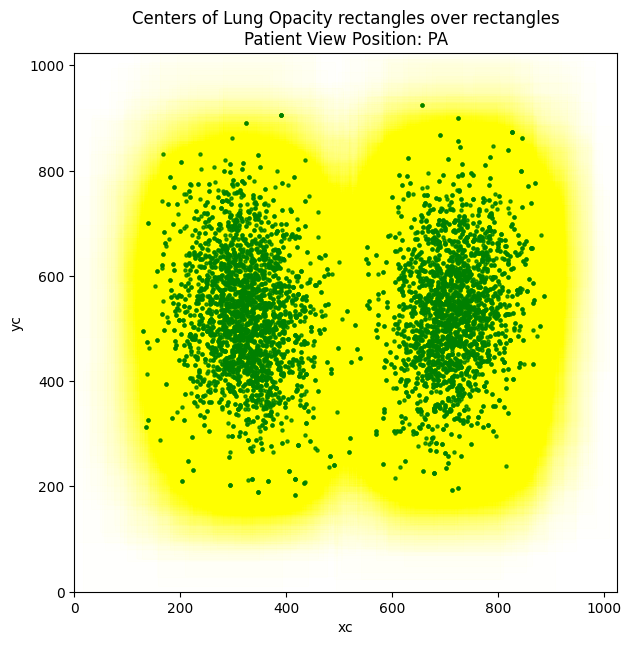

In [ ]:
classify = (class_info_train_labels_merge_metadata['ViewPosition']=='AP')

plot_window(class_info_train_labels_merge_metadata[ classify ],'green', 'yellow', 'Patient View Position: PA')
# Lung Opacities are present mostly in the central part.

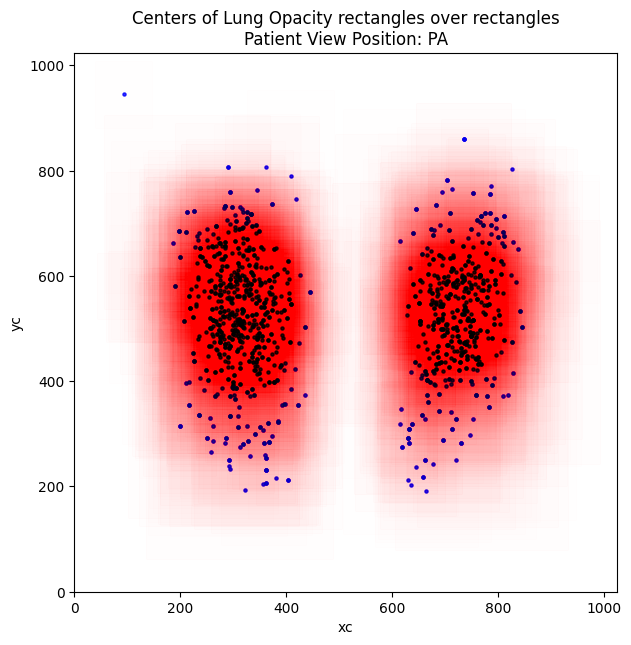

In [ ]:
classify = (class_info_train_labels_merge_metadata['ViewPosition']=='PA')

plot_window(class_info_train_labels_merge_metadata[ classify ],'blue', 'red', 'Patient View Position: PA')
# Distribution is slightly different for view position  PA

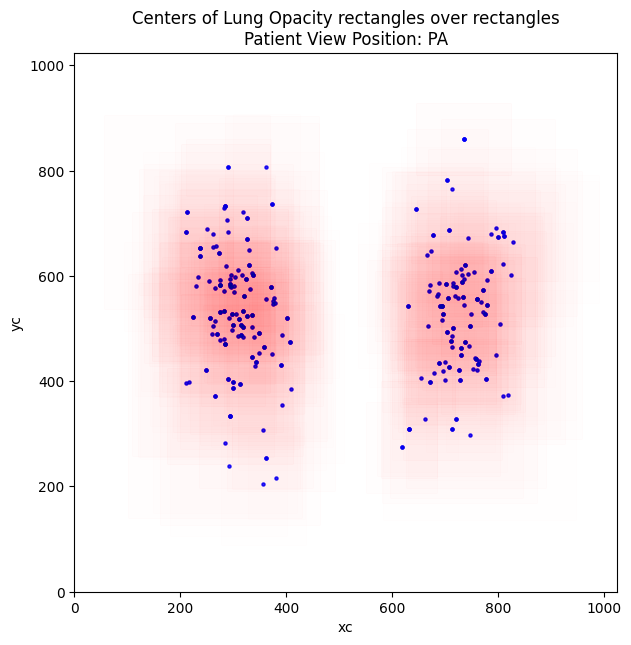

In [ ]:
classify = (class_info_train_labels_merge_metadata['ViewPosition']=='PA') & (class_info_train_labels_merge_metadata['PatientAgeBucket']==pd.Interval(50,60))

plot_window(class_info_train_labels_merge_metadata[ classify ],'blue', 'red', 'Patient View Position: PA')
# Checking the distribution for 50-60 age group.

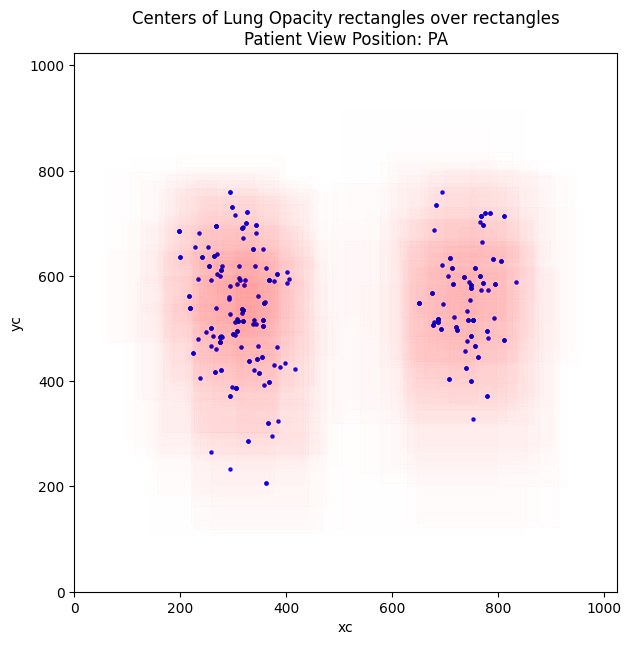

In [ ]:
classify = (class_info_train_labels_merge_metadata['ViewPosition']=='PA') & (class_info_train_labels_merge_metadata['PatientAgeBucket']==pd.Interval(60,70))

plot_window(class_info_train_labels_merge_metadata[ classify ],'blue', 'red', 'Patient View Position: PA')

## All Images

In [ ]:
def show_dicom_images_with_boxes(data):
    img_data = list(data.T.to_dict().values())
    f, ax = plt.subplots(3, 3, figsize=(16, 18))

    for i, data_row in enumerate(img_data):
        patient_image = data_row['patientId'] + '.dcm'
        image_path = os.path.join(PROJECT_PATH, "New folder/stage_2_train_images/", patient_image)

        try:
            data_row_img_data = pydicom.read_file(image_path)
            modality = data_row_img_data.Modality
            age = data_row_img_data.PatientAge
            sex = data_row_img_data.PatientSex
            data_row_img = load_image(image_path)

            ax[i // 3, i % 3].imshow(data_row_img.pixel_array, cmap=plt.cm.bone)
            ax[i // 3, i % 3].axis('off')
            ax[i // 3, i % 3].set_title('ID: {}\nModality: {} Age: {} Sex: {} Target: {}\nClass: {}'.format(
                data_row['patientId'], modality, age, sex, data_row['Target'], data_row['class']))

            rows = class_info_train_labels_merge_metadata[class_info_train_labels_merge_metadata['patientId'] == data_row['patientId']]
            box_data = list(rows.T.to_dict().values())

            for j, row in enumerate(box_data):
                ax[i // 3, i % 3].add_patch(Rectangle(xy=(row['x'], row['y']),
                                                     width=row['width'], height=row['height'],
                                                     color="yellow", alpha=0.1))

        except Exception as e:
            print(f"Error processing image {image_path}: {e}")

    plt.show()


**Showing the images of Class: No Lung Opacity/ Not Normal**

Loaded image: /content/drive/MyDrive/Colab Notebooks/New folder/stage_2_train_images/dce268d1-f61f-4ac3-9282-efd605fd21ac.dcm
Loaded image: /content/drive/MyDrive/Colab Notebooks/New folder/stage_2_train_images/a8e8e360-1c06-4932-820f-cc0066da187e.dcm
Loaded image: /content/drive/MyDrive/Colab Notebooks/New folder/stage_2_train_images/ce111d3e-ccce-4d38-a5cf-b31d73e620f1.dcm
Loaded image: /content/drive/MyDrive/Colab Notebooks/New folder/stage_2_train_images/904c510d-2449-45bc-988e-c8f079aaba71.dcm
Error processing image /content/drive/MyDrive/Colab Notebooks/New folder/stage_2_train_images/8ae1261b-3ea0-4428-a4ec-af36a7b1afb9.dcm: [Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/New folder/stage_2_train_images/8ae1261b-3ea0-4428-a4ec-af36a7b1afb9.dcm'
Loaded image: /content/drive/MyDrive/Colab Notebooks/New folder/stage_2_train_images/a7fad7f7-9d4f-4595-9097-7e7b28195679.dcm
Error processing image /content/drive/MyDrive/Colab Notebooks/New folder/stage_2_tr

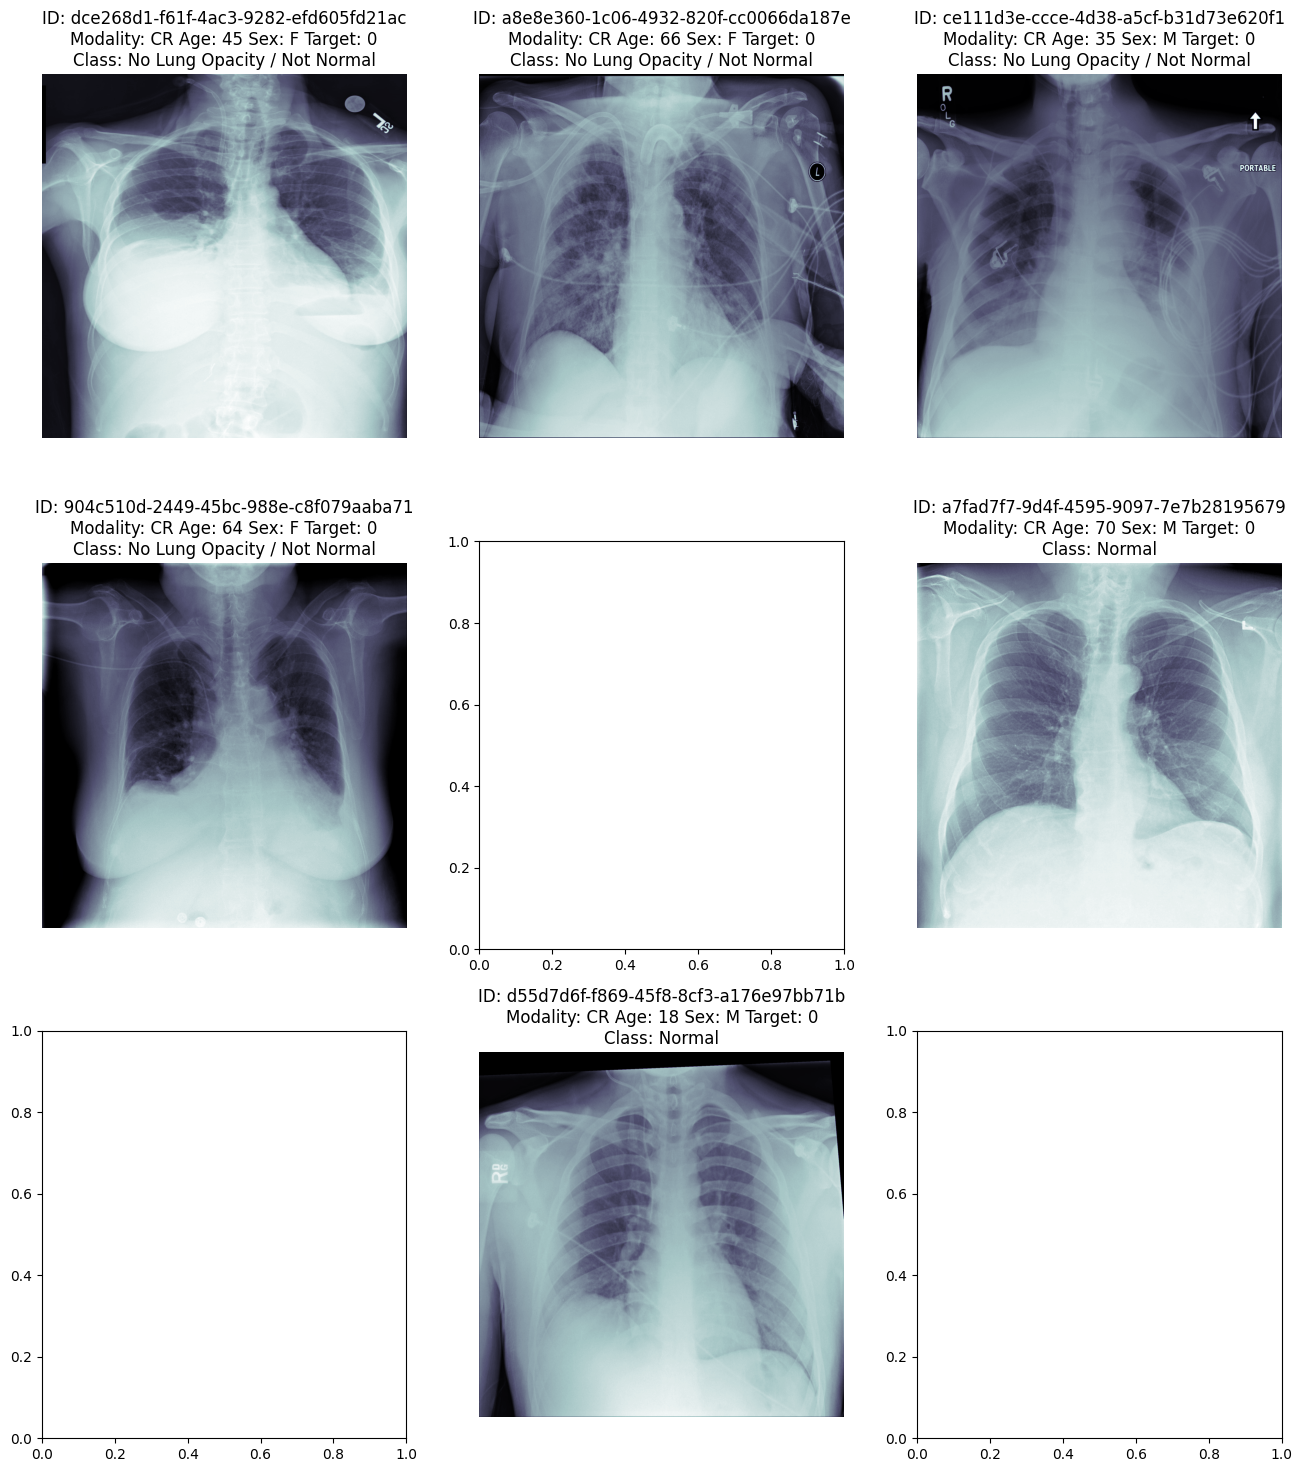

In [ ]:
show_dicom_images_with_boxes(class_info_train_labels_merge_metadata[class_info_train_labels_merge_metadata['Target']==0].sample(9))

**Showing the images of Class:  Lung Opacity**

Error processing image /content/drive/MyDrive/Colab Notebooks/New folder/stage_2_train_images/3e439e6d-97d9-40b8-b201-794a5ce5ff1e.dcm: [Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/New folder/stage_2_train_images/3e439e6d-97d9-40b8-b201-794a5ce5ff1e.dcm'
Loaded image: /content/drive/MyDrive/Colab Notebooks/New folder/stage_2_train_images/7e2246e4-8412-4216-af50-7ae8c232f9b9.dcm
Loaded image: /content/drive/MyDrive/Colab Notebooks/New folder/stage_2_train_images/351a2161-64fb-41c0-889f-653d320a406f.dcm
Error processing image /content/drive/MyDrive/Colab Notebooks/New folder/stage_2_train_images/a16503fc-2eb7-4a00-b101-2b5d976dc8a9.dcm: [Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/New folder/stage_2_train_images/a16503fc-2eb7-4a00-b101-2b5d976dc8a9.dcm'
Error processing image /content/drive/MyDrive/Colab Notebooks/New folder/stage_2_train_images/88dfac4d-30d4-42fe-9122-82246ecee401.dcm: [Errno 2] No such file or directory: '

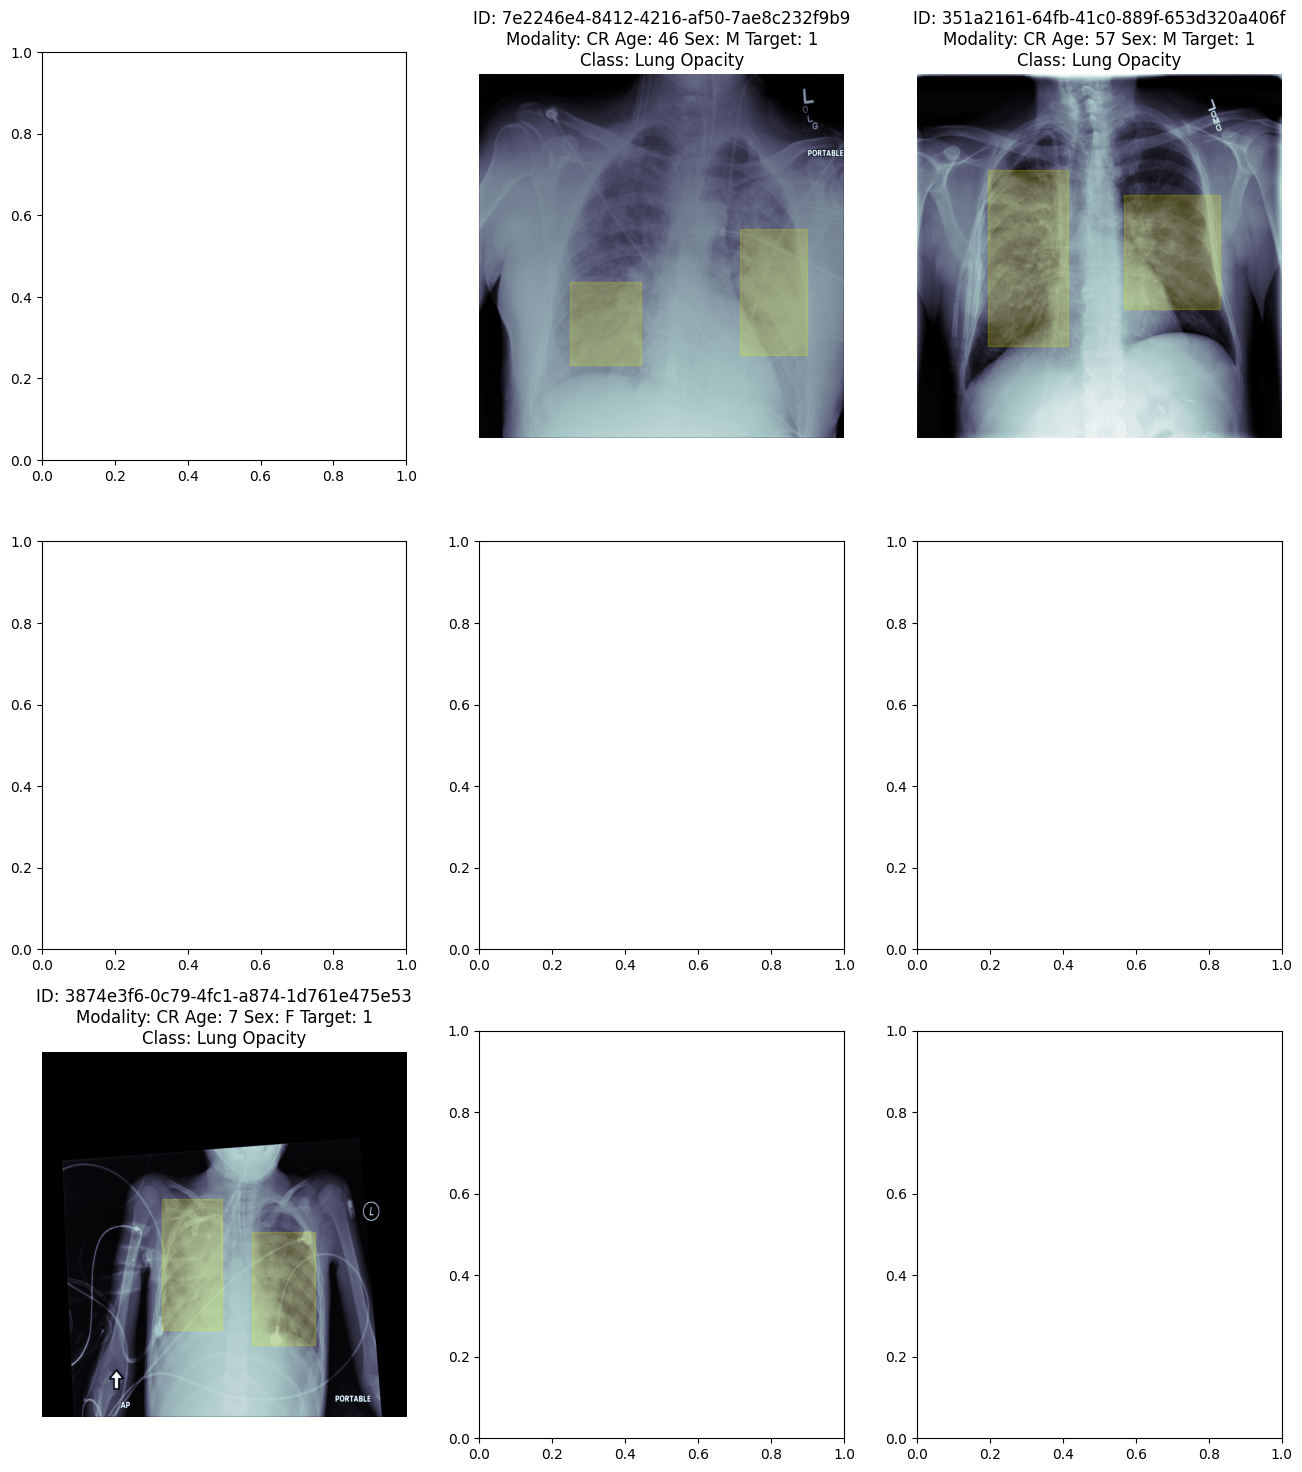

In [ ]:
show_dicom_images_with_boxes(class_info_train_labels_merge_metadata[class_info_train_labels_merge_metadata['Target']==1].sample(9))

# CNN Model

## Load Dependencies

In [ ]:
import os
import csv
import random
!pip install pydicom
import pydicom
import numpy as np
import pandas as pd
from skimage import io
from skimage import measure
from skimage.transform import resize

import tensorflow as tf
from tensorflow import keras

from matplotlib import pyplot as plt
import matplotlib.patches as patches

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 11.1 MB/s eta 0:00:00


## Split into train and validation

In [ ]:
# Import join used to join ROOT path and MY_GOOGLE_DRIVE_PATH
from os.path import join
import os
import pandas as pd
import random

# path to your project on Google Drive
MY_GOOGLE_DRIVE_PATH = 'MyDrive/Colab Notebooks/'  # Updated path
train_folder = 'New folder/stage_2_train_images/'  # Updated path
test_folder = 'stage_2_test_images1234/'  # Updated path
saved_folder = 'Saved_Data/'

# Assume ROOT is defined somewhere in your code
# ROOT = ...

PROJECT_PATH = join(ROOT, MY_GOOGLE_DRIVE_PATH)
TRAIN_PATH = join(PROJECT_PATH, train_folder)
TEST_PATH = join(PROJECT_PATH, test_folder)
SAVE_PATH = join(PROJECT_PATH, saved_folder)
GIT_LOCAL_PATH = join(PROJECT_PATH, 'git/')

# Create the Saved_Data directory if it doesn't exist
os.makedirs(SAVE_PATH, exist_ok=True)

# It's good to print out the value if you are not sure
print("PROJECT_PATH: ", PROJECT_PATH)
print("TRAIN_PATH: ", TRAIN_PATH)
print("TEST_PATH: ", TEST_PATH)
print("SAVE_PATH: ", SAVE_PATH)
print("GIT_LOCAL_PATH: ", GIT_LOCAL_PATH)

# In case we haven't created the folder already; we will create a folder in the project path
%mkdir "{PROJECT_PATH}"

# Fetch filenames from the directory excluding '__MACOSX'
filenames = [filename for filename in os.listdir(TRAIN_PATH) if not filename.startswith('__')]

# Shuffle the filenames
random.shuffle(filenames)

# Define the percentage of data to be used
percentage_data_used = 100

# Calculate the total number of files to be used
file_count = int(len(filenames) * percentage_data_used / 100)

# Split into train and validation filenames
n_valid_samples = int(file_count * 0.3)

train_filenames = filenames[n_valid_samples:file_count]
valid_filenames = filenames[:n_valid_samples]

print('n train samples', len(train_filenames))
print('n valid samples', len(valid_filenames))
n_train_samples = len(filenames) - n_valid_samples

image_dimension = 128
print('Image Dimension to use:', image_dimension)
print('sample file:', train_filenames[0])  # Use train_filenames instead of filenames


PROJECT_PATH:  /content/drive/MyDrive/Colab Notebooks/
TRAIN_PATH:  /content/drive/MyDrive/Colab Notebooks/New folder/stage_2_train_images/
TEST_PATH:  /content/drive/MyDrive/Colab Notebooks/stage_2_test_images1234/
SAVE_PATH:  /content/drive/MyDrive/Colab Notebooks/Saved_Data/
GIT_LOCAL_PATH:  /content/drive/MyDrive/Colab Notebooks/git/
mkdir: cannot create directory ‘/content/drive/MyDrive/Colab Notebooks/’: File exists
n train samples 8575
n valid samples 3675
Image Dimension to use: 128
sample file: 193d589c-8295-4445-8e13-bd3beeddcbe4.dcm


**The code sets up the necessary file paths, organizes the data into training and validation sets, and prepares the environment for subsequent tasks related to medical image processing or machine learning model training.**

## Check distribution of train and test vs original

In [ ]:
# Check dist of selected files based on the csv that was provided.
# Did not try stratified sampling since the distribution is not impacted much.
def check_distribution(dataframe_to_check):
  filename_check = pd.DataFrame(columns=['patientId','class'])
  #get filename
  for filename in dataframe_to_check:
    filename_check = pd.concat([filename_check, class_info[class_info['patientId'] == filename.split('.')[0]]])


  print('Rows',len(filename_check))
  print('unique',len(filename_check['patientId'].unique()))
  print(filename_check['class'].value_counts(normalize = True))

check_distribution(train_filenames)
check_distribution(valid_filenames)

Rows 9725
unique 8575
No Lung Opacity / Not Normal    0.385604
Lung Opacity                    0.317738
Normal                          0.296658
Name: class, dtype: float64
Rows 4175
unique 3675
No Lung Opacity / Not Normal    0.385150
Lung Opacity                    0.323832
Normal                          0.291018
Name: class, dtype: float64


For the training filenames, the output indicates that there are 9,719 rows corresponding to 8,575 unique patients. The distribution of classes is as follows:

No Lung Opacity / Not Normal: 38.66%
Lung Opacity: 31.74%
Normal: 29.60%
Similarly, for the validation filenames, there are 4,181 rows corresponding to 3,675 unique patients. The class distribution is:

No Lung Opacity / Not Normal: 38.29%
Lung Opacity: 32.46%
Normal: 29.25%

In [ ]:
check_distribution(filenames)
# Overall Distribution is very similar to the distribution in train and validation data set.

Rows 13900
unique 12250
No Lung Opacity / Not Normal    0.385468
Lung Opacity                    0.319568
Normal                          0.294964
Name: class, dtype: float64


In [ ]:
# identifying if there are any files beside dcm in the folder
for name in filenames:
  le = len(name)
  if(name[le-3:le] != 'dcm'):
    print(name)

## Create a dictionary of pneumonia locations in one place.

In [ ]:
# empty dictionary
pneumonia_locations = {}
# load table
with open(os.path.join(PROJECT_PATH,'stage_2_train_labels.csv'), mode='r') as infile:
    # open reader
    reader = csv.reader(infile)
    # skip header
    next(reader, None)
    # loop through rows
    for rows in reader:
        # retrieve information
        filename = rows[0]
        location = rows[1:5]
        pneumonia = rows[5]
        # if row contains pneumonia add label to dictionary
        # which contains a list of pneumonia locations per filename
        if pneumonia == '1':
            # convert string to float to int
            location = [int(float(i)) for i in location]
            # save pneumonia location in dictionary
            if filename in pneumonia_locations:
                pneumonia_locations[filename].append(location)
            else:
                pneumonia_locations[filename] = [location]

 this code parses a CSV file, identifies images with pneumonia, and records the specific locations of pneumonia in those images, storing this information in the pneumonia_locations dictionary. This process is common in medical image analysis where labeled data is crucial for training machine learning models to detect and analyze medical conditions.

## Generator class

In [ ]:
import keras

# The dataset is too large to fit into memory, so we need to create a generator that loads data on the fly.
# Generator class to handle:

class generator(keras.utils.Sequence):

    def __init__(self, folder, filenames, pneumonia_locations=None, batch_size=32, image_size=image_dimension, shuffle=True, augment=False, predict=False):
        self.folder = folder
        self.filenames = filenames
        self.pneumonia_locations = pneumonia_locations
        self.batch_size = batch_size
        self.image_size = image_size
        self.shuffle = shuffle
        self.augment = augment
        self.predict = predict
        self.on_epoch_end()

    # Loads the file from folder, resizes and augments the data with horizontal flip
    def __load__(self, filename):
        # load dicom file as numpy array
        #print('reading file:', filename)
        img = pydicom.dcmread(os.path.join(self.folder, filename), force=True).pixel_array

        # create empty mask
        msk = np.zeros(img.shape)
        # get filename without extension
        filename = filename.split('.')[0]
        # if image contains pneumonia
        if filename in self.pneumonia_locations:
            # loop through pneumonia
            for location in self.pneumonia_locations[filename]:
                # add 1's at the location of the pneumonia
                x, y, w, h = location
                msk[y:y+h, x:x+w] = 1
        # resize both image and mask
        img = resize(img, (self.image_size, self.image_size), mode='reflect')
        msk = resize(msk, (self.image_size, self.image_size), mode='reflect') > 0.5
        # if augment then horizontal flip half the time
        if self.augment and random.random() > 0.5:
            img = np.fliplr(img)
            msk = np.fliplr(msk)
        # add trailing channel dimension
        img = np.expand_dims(img, -1)
        msk = np.expand_dims(msk, -1)
        return img, msk

    # Loads images during prediction cycles
    def __loadpredict__(self, filename):
        # load dicom file as numpy array
        # print('reading file:', filename)
        img = pydicom.dcmread(os.path.join(self.folder, filename), force=True).pixel_array

        # resize image
        img = resize(img, (self.image_size, self.image_size), mode='reflect')
        # add trailing channel dimension
        img = np.expand_dims(img, -1)
        return img

    # Generator must implement this getter function
    def __getitem__(self, index):
        # select batch
        filenames = self.filenames[index*self.batch_size:(index+1)*self.batch_size]
        # predict mode: return images and filenames
        if self.predict:
            # load files
            imgs = [self.__loadpredict__(filename) for filename in filenames]
            # create numpy batch
            imgs = np.array(imgs)
            return imgs, filenames
        # train mode: return images and masks
        else:
            # load files
            items = [self.__load__(filename) for filename in filenames]
            # unzip images and masks
            imgs, msks = zip(*items)
            # create numpy batch
            imgs = np.array(imgs)
            msks = np.array(msks)
            return imgs, msks

    # Shuffle data before start of next epoc
    def on_epoch_end(self):
        if self.shuffle:
            random.shuffle(self.filenames)

    def __len__(self):
        if self.predict:
            # return everything
            return int(np.ceil(len(self.filenames) / self.batch_size))
        else:
            # return full batches only
            return int(len(self.filenames) / self.batch_size)

This generator plays a crucial role in managing extensive medical image datasets effectively, especially in the context of training deep learning models. Its significance lies in its ability to load, preprocess, and augment images on-the-fly, addressing challenges posed by large datasets that cannot fit into memory at once. By doing so, it ensures that the training process is not hindered by memory limitations, allowing the model to learn from diverse and extensive medical image data. In essence, this generator facilitates the training of sophisticated deep learning models on substantial datasets while optimizing memory usage, a key requirement in medical image analysis tasks.

## Layers and Model Architecture

In [ ]:
# create 1 downsample layer, each containing 4 layers in it
def create_downsample(channels, inputs):
    x = keras.layers.BatchNormalization(momentum=0.9)(inputs)
    x = keras.layers.LeakyReLU(0)(x)
    x = keras.layers.Conv2D(channels, 1, padding='same', use_bias=False)(x)
    x = keras.layers.MaxPool2D(2)(x)
    return x

# creates 1 residual layer, each containing 6 layers in it.
def create_resblock(channels, inputs):
    x = keras.layers.BatchNormalization(momentum=0.9)(inputs)
    x = keras.layers.LeakyReLU(0)(x)
    x = keras.layers.Conv2D(channels, 3, padding='same', use_bias=False)(x)
    x = keras.layers.BatchNormalization(momentum=0.9)(x)
    x = keras.layers.LeakyReLU(0)(x)
    x = keras.layers.Conv2D(channels, 3, padding='same', use_bias=False)(x)
    return keras.layers.add([x, inputs])

# Model creator
# Depth = number of layers in the model
def create_network(input_size, channels, n_blocks=2, depth=4):
    # input layers - 2 layer
    inputs = keras.Input(shape=(input_size, input_size, 1))
    x = keras.layers.Conv2D(channels, 3, padding='same', use_bias=False)(inputs)
    # residual blocks (4*4 downsample + 4*2*6 resblock = 64 layers)
    for d in range(depth):
        channels = channels * 2
        x = create_downsample(channels, x)
        for b in range(n_blocks):
            x = create_resblock(channels, x)
    # output - 4 layers
    x = keras.layers.BatchNormalization(momentum=0.9)(x)
    x = keras.layers.LeakyReLU(0)(x)
    x = keras.layers.Conv2D(1, 1, activation='sigmoid')(x)
    outputs = keras.layers.UpSampling2D(2**depth)(x)
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

This code defines a deep learning model architecture for medical image segmentation. The model comprises a series of downsampling and residual layers. The create_downsample function adds a downsampling block with batch normalization, leaky ReLU activation, 1x1 convolution, and max-pooling. The create_resblock function defines a residual block with two convolutional layers and batch normalization. The overall model, created by create_network, starts with a 3x3 convolutional layer and then alternates between downsampling blocks and residual blocks. The final layer performs a 1x1 convolution with sigmoid activation for binary segmentation output. The model is structured to handle medical images with an input size of input_size and a specified number of channels. The depth and number of blocks can be adjusted to control the overall model complexity.

## Learning Functions

In [ ]:
import tensorflow as tf
from keras import backend as K

def iou_loss(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)

    intersection = tf.reduce_sum(tf.cast(y_true * y_pred, tf.float32))
    union = tf.reduce_sum(y_true) + tf.reduce_sum(y_pred) - intersection
    iou = intersection / (union + K.epsilon())

    return 1.0 - iou

def iou_bce_loss(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)

    return 0.5 * tf.keras.losses.binary_crossentropy(y_true, y_pred) + 0.5 * iou_loss(y_true, y_pred)


 This combined loss encourages the model to accurately predict pixel-wise binary segmentation while also considering the spatial overlap between the predicted and true masks. These loss functions are designed for training neural networks in semantic segmentation tasks, where precise object localization is crucial.

In [ ]:
# define iou or jaccard loss function
import tensorflow as tf
from keras import backend as K

def iou_loss(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)

    intersection = tf.reduce_sum(tf.cast(y_true * y_pred, tf.float32))
    union = tf.reduce_sum(y_true) + tf.reduce_sum(y_pred) - intersection
    iou = intersection / (union + K.epsilon())

    return 1.0 - iou

def iou_bce_loss(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)

    return 0.5 * tf.keras.losses.binary_crossentropy(y_true, y_pred) + 0.5 * iou_loss(y_true, y_pred)

# mean iou as a metric
def mean_iou(y_true, y_pred):
    y_pred = tf.round(y_pred)
    intersect = tf.reduce_sum(y_true * y_pred, axis=[1, 2, 3])
    union = tf.reduce_sum(y_true, axis=[1, 2, 3]) + tf.reduce_sum(y_pred, axis=[1, 2, 3])
    smooth = tf.ones(tf.shape(intersect))
    return tf.reduce_mean((intersect + smooth) / (union - intersect + smooth))

# create network and compiler
model = create_network(input_size=image_dimension, channels=32, n_blocks=2, depth=4)
model.compile(optimizer='adam',
              loss=iou_bce_loss,
              metrics=['accuracy', mean_iou])

model.summary()


def cosine_annealing(x):
    lr = 0.001
    epochs = 25
    return lr* (np.cos(np.pi*x/epochs)+1.) /2
learning_rate = tf.keras.callbacks.LearningRateScheduler(cosine_annealing)

# keeps logging the epoc output simultaneously while training
csv_logger = tf.keras.callbacks.CSVLogger(SAVE_PATH + 'logs_cnn_segment.csv', append = True)


cp = tf.keras.callbacks.ModelCheckpoint(filepath = SAVE_PATH + 'model_checkpoint.h5', verbose = 1, save_best_only = True)


early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.005, patience=4, restore_best_weights=True, verbose=1, mode='auto')

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 128, 128, 1)]        0         []                            
                                                                                                  
 conv2d_22 (Conv2D)          (None, 128, 128, 32)         288       ['input_2[0][0]']             
                                                                                                  
 batch_normalization_21 (Ba  (None, 128, 128, 32)         128       ['conv2d_22[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 leaky_re_lu_21 (LeakyReLU)  (None, 128, 128, 32)         0         ['batch_normalization_21

The output is a summary of the neural network architecture created using Keras. Here's a breakdown of the information provided:

**Model Structure:** The model consists of several layers with different types such as Conv2D, BatchNormalization, LeakyReLU, MaxPooling2D, Add, and UpSampling2D.

**Input Layer:** The input layer (input_1) has a shape of (128, 128, 1), indicating an input image size of 128x128 pixels with a single channel (grayscale).

Layer Details: Each layer is described with its type, output shape, and the number of parameters. For example, conv2d is a convolutional layer with 32 output channels, and it has 288 parameters.

**Residual Blocks:** The model architecture includes residual blocks, where the output of a Convolutional layer is added to the input, helping with the training of deep networks.

**Total Parameters:** The model has a total of 12,727,969 parameters, which includes trainable and non-trainable parameters. Trainable parameters are the ones that will be updated during the training process to learn patterns from the data.

**Trainable and Non-trainable Parameters:** Out of the total parameters, 12,718,305 are trainable (weights that are updated during training), and 9,664 are non-trainable (parameters in BatchNormalization layers, for example).

**Output Layer:** The output layer (conv2d_21) produces a segmentation map with a single channel (1) and has 513 parameters.

 The model is designed with residual blocks to facilitate training and improve the learning of intricate patterns in medical images.

## Model Training

In [ ]:
from keras.callbacks import LearningRateScheduler, CSVLogger, EarlyStopping
from os.path import join
import os
# Print the list of files in the TEST_PATH directory
test_files = os.listdir(TEST_PATH)
print("Files in TEST_PATH directory:", test_files)

Files in TEST_PATH directory: ['0000a175-0e68-4ca4-b1af-167204a7e0bc.dcm', '0005d3cc-3c3f-40b9-93c3-46231c3eb813.dcm', '000686d7-f4fc-448d-97a0-44fa9c5d3aa6.dcm', '000e3a7d-c0ca-4349-bb26-5af2d8993c3d.dcm', '00100a24-854d-423d-a092-edcf6179e061.dcm', '0015597f-2d69-4bc7-b642-5b5e01534676.dcm', '001b0c51-c7b3-45c1-9c17-fa7594cab96e.dcm', '0022bb50-bf6c-4185-843e-403a9cc1ea80.dcm', '00271e8e-aea8-4f0a-8a34-3025831f1079.dcm', '0028450f-5b8e-4695-9416-8340b6f686b0.dcm', '002bcde0-d8da-4931-ab04-5d724e30261b.dcm', '002fcb77-ef76-4626-ab34-5070f15c20db.dcm', '003206b4-bd4a-4684-8d49-76f4cb713a30.dcm', '00330f7f-d114-4eb2-9c6e-558eeb3084a1.dcm', '00342ae8-ff81-4229-adf6-6a2ab711707b.dcm', '003d17f0-bd8a-485c-bc8b-daec33f53efa.dcm', '003dba79-1b1d-4713-add8-d72c54074f8a.dcm', '003ec9e3-512e-4f6e-923d-daa9f9f3db9a.dcm', '003fbda2-ba55-4714-a03a-83f15bec19e4.dcm', '0041fc67-793c-4129-a952-ea3fb821b445.dcm', '00475531-1036-4ab4-8c12-1eac7e9ddfd1.dcm', '0048e89e-f88a-41a1-b79f-ab4e7135627e.dcm', '

Test data is already unzipped.


In [ ]:
# Before importing any Keras or TensorFlow modules, set GPU options
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)



In [ ]:
from keras.callbacks import LearningRateScheduler, CSVLogger, EarlyStopping, ModelCheckpoint
from os.path import join
import os
import pandas as pd

# ... (your existing code)

# Generators
train_gen = generator(TRAIN_PATH, train_filenames, pneumonia_locations, batch_size=32, image_size=image_dimension, shuffle=True, augment=True, predict=False)
valid_gen = generator(TEST_PATH, valid_filenames, pneumonia_locations, batch_size=32, image_size=image_dimension, shuffle=False, predict=False)

# Callbacks
learning_rate = LearningRateScheduler(schedule=lambda epoch: 0.001 * 0.95 ** epoch)
csv_logger = CSVLogger(join(SAVE_PATH, 'training_log.csv'))
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Add ModelCheckpoint
model_checkpoint = ModelCheckpoint(join(SAVE_PATH, 'model_checkpoint.h5'), save_best_only=True)

# Training
history = model.fit_generator(
    generator=train_gen,
    validation_data=valid_gen,
    callbacks=[learning_rate, csv_logger, early_stopping, model_checkpoint],
    epochs=1,  # Adjust the number of epochs
    workers=4,
    use_multiprocessing=True
)

# Save Model and history
training_mode = True
if training_mode:
    export_file_path = join(SAVE_PATH, 'pneumonia_model.h5')

    # Save the model
    model.save(export_file_path)
    print('Model saved')

    # Save history file
    print(history.history.keys())
    hist_df = pd.DataFrame(history.history)
    hist_csv_file = join(SAVE_PATH, 'pneumonia_model_history.csv')
    with open(hist_csv_file, mode='w') as f:
        hist_df.to_csv(f)
    print('History saved')
else:
    # Load the model
    model.load_weights(join(SAVE_PATH, 'pneumonia_model.h5'))

    # Load the history
    history = pd.read_csv(join(SAVE_PATH, 'pneumonia_model_history.csv'))


<ipython-input-81-9a828dd0ccaa>:21: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


 14/267 [>.............................] - ETA: 1:13:33 - loss: 0.4703 - accuracy: 0.9575 - mean_iou: 0.6512

Process Keras_worker_ForkPoolWorker-12:
Process Keras_worker_ForkPoolWorker-10:
Process Keras_worker_ForkPoolWorker-9:
Traceback (most recent call last):
Traceback (most recent call last):
Process Keras_worker_ForkPoolWorker-11:
Traceback (most recent call last):
  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
Traceback (most recent call last):
  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.10/multiprocessing/pool.py",

KeyboardInterrupt: 

File '/content/drive/MyDrive/Colab Notebooks/stage_2_test_images/89c5629e-c472-4e00-8810-71ef51ab1cf6.dcm' not found.


## Model Accuracy Check

NameError: name 'history' is not defined

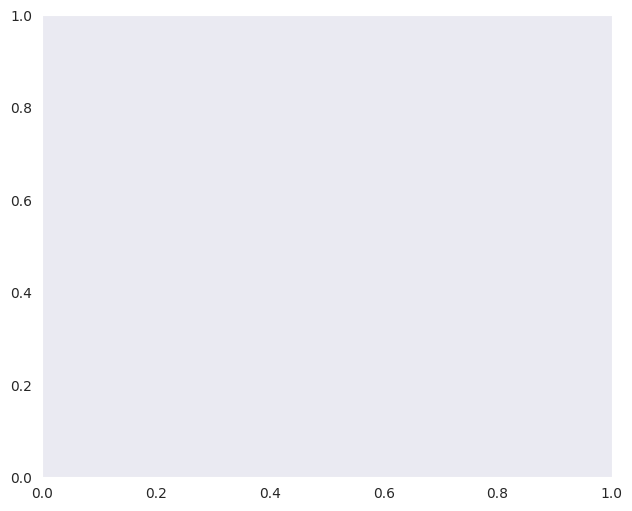

In [ ]:
plt.figure(figsize=(25,6))
plt.subplot(131)
plt.plot(history.epoch, history.history["loss"], label="Train loss")
plt.plot(history.epoch, history.history["val_loss"], label="Valid loss")
plt.legend()
plt.subplot(132)
plt.plot(history.epoch, history.history["accuracy"], label="Train accuracy")
plt.plot(history.epoch, history.history["val_accuracy"], label="Valid accuracy")
plt.legend()
plt.subplot(133)
plt.plot(history.epoch, history.history["mean_iou"], label="Train iou")
plt.plot(history.epoch, history.history["val_mean_iou"], label="Valid iou")
plt.legend()
plt.show()


## Visual Verification

In [ ]:
# Red is predicted mask, Blue is actual Mask
for imgs, msks in valid_gen:
    # predict batch of images
    preds = model.predict(imgs)
    # create figure
    f, axarr = plt.subplots(4, 8, figsize=(20,15))

    # Flatten the array
    axarr = axarr.ravel()
    axidx = 0

    # loop through batch
    for img, msk, pred in zip(imgs, msks, preds):
        # plot image
        axarr[axidx].imshow(img[:, :, 0])

        # threshold true mask
        comp = msk[:, :, 0] > 0.5
        # apply connected components
        comp = measure.label(comp)
        # apply bounding boxes
        predictionString = ''
        for region in measure.regionprops(comp):
            # retrieve x, y, height and width
            y, x, y2, x2 = region.bbox
            height = y2 - y
            width = x2 - x
            axarr[axidx].add_patch(patches.Rectangle((x,y),width,height,linewidth=2,edgecolor='b',facecolor='none'))

        # threshold predicted mask
        comp = pred[:, :, 0] > 0.5
        # apply connected components
        comp = measure.label(comp)
        # apply bounding boxes
        predictionString = ''
        for region in measure.regionprops(comp):
            # retrieve x, y, height and width
            y, x, y2, x2 = region.bbox
            height = y2 - y
            width = x2 - x
            axarr[axidx].add_patch(patches.Rectangle((x,y),width,height,linewidth=2,edgecolor='r',facecolor='none'))
        axidx += 1
    plt.show()
    # only plot one batch
    break

    # There was considerable IOU for the images where prediction was correct.

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/stage_2_test_images/56823833-5b67-4a71-9021-2669e01f2ccf.dcm'

# Predict Test Images

In [ ]:
# load and shuffle filenames
folder = PROJECT_PATH+'Data/stage_2_test_images'
test_filenames = os.listdir(folder)[:100]
print('n test samples:', len(test_filenames))

# create test generator with predict flag set to True
test_gen = generator(folder, test_filenames, None, batch_size=25, image_size=image_dimension, shuffle=False, predict=True)

# create submission dictionary
submission_dict = {}
# loop through testset
for imgs, filenames in test_gen:
    # predict batch of images
    preds = model.predict(imgs)
    # loop through batch
    for pred, filename in zip(preds, filenames):
        # resize predicted mask
        pred = resize(pred, (1024, 1024), mode='reflect')
        # threshold predicted mask
        comp = pred[:, :, 0] > 0.5
        # apply connected components
        comp = measure.label(comp)
        # apply bounding boxes
        predictionString = ''
        for region in measure.regionprops(comp):
            # retrieve x, y, height and width
            y, x, y2, x2 = region.bbox
            height = y2 - y
            width = x2 - x
            # proxy for confidence score
            conf = np.mean(pred[y:y+height, x:x+width])
            # add to predictionString
            predictionString += str(conf) + ' ' + str(x) + ' ' + str(y) + ' ' + str(width) + ' ' + str(height) + ' '
        # add filename and predictionString to dictionary
        filename = filename.split('.')[0]
        submission_dict[filename] = predictionString
    # stop if we've got them all
    if len(submission_dict) >= len(test_filenames):
        break

# save dictionary as csv file
sub = pd.DataFrame.from_dict(submission_dict,orient='index')
sub.index.names = ['patientId']
sub.columns = ['PredictionString']
sub.to_csv(SAVE_PATH+'pneumonia_model_submission.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/Data/stage_2_test_images'